In [1]:
#importing packages
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#reading csv file
data=pd.read_csv("C:/Users/rakhi/Downloads/StudentsPerformance.csv")
data

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group C,some high school,free/reduced,none,0,17,10
1,female,group B,high school,free/reduced,none,8,24,23
2,female,group B,some high school,free/reduced,none,18,32,28
3,female,group B,some college,standard,none,11,38,32
4,female,group C,some college,free/reduced,none,22,39,33
...,...,...,...,...,...,...,...,...
995,male,group E,some college,standard,completed,99,87,81
996,male,group A,some college,standard,completed,100,96,86
997,male,group D,some college,standard,completed,100,97,99
998,male,group E,associate's degree,free/reduced,completed,100,100,93


In [3]:
#checking null values
data.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [5]:
#coloumn names
data.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

#### 1. Find out how many males and females participated in the test.

C:\Users\rakhi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


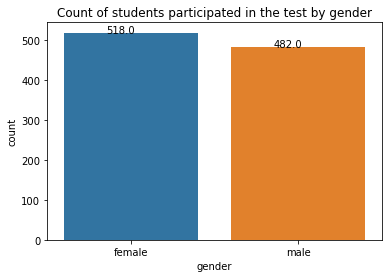

In [6]:
plt.title("Count of students participated in the test by gender")
a=sns.countplot(data["gender"])
for i in a.patches:
        a.annotate("{:.1f}".format(i.get_height()),(i.get_x()+0.25, i.get_height()+0.01))

518 females and 482 males participated in the test.

#### 2. What do you think about the students' parental level of education?

C:\Users\rakhi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


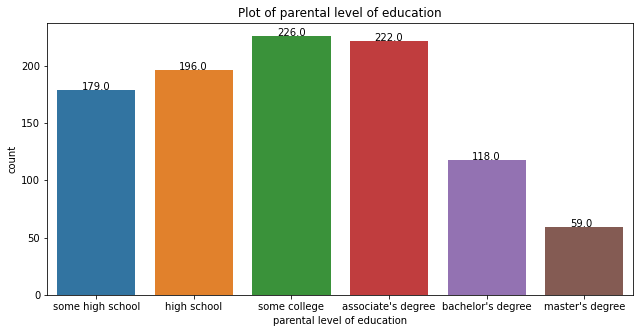

In [7]:
plt.figure(figsize=(10.5,5))
plt.title("Plot of parental level of education")
b=sns.countplot(data["parental level of education"])
for p in b.patches:
        b.annotate("{:.1f}".format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

1. Most of the parents have some college level education and associate's degree.
2. Parents with master's degree and bachelor's degree are few compared to others.
3. Parents with high school level education lies in between these two groups.

#### 3. Who scores the most on average for math, reading and writing based on

In [8]:
#adding the coloumn of average for the three subjects
data1=data[["gender","test preparation course","math score","reading score","writing score"]].copy()
avg_score=data1.mean(axis=1)
data1["average_score"]=avg_score
data1

,gender,test preparation course,math score,reading score,writing score,average_score
0,female,none,0,17,10,9.000000
1,female,none,8,24,23,18.333333
2,female,none,18,32,28,26.000000
3,female,none,11,38,32,27.000000
4,female,none,22,39,33,31.333333
...,...,...,...,...,...,...
995,male,completed,99,87,81,89.000000
996,male,completed,100,96,86,94.000000
997,male,completed,100,97,99,98.666667
998,male,completed,100,100,93,97.666667


#### Gender

Based on individual average of math, reading and writing score

In [9]:
mean_gender=data.groupby("gender")[["math score","reading score","writing score"]].mean()
mean_gender

,math score,reading score,writing score
gender,,,
female,63.376448,72.590734,72.467181
male,68.821577,65.545643,63.446058


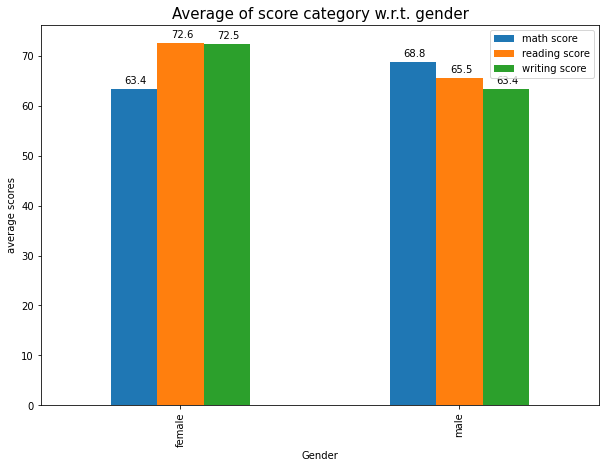

In [10]:
c=mean_gender.plot(kind="bar",ylabel="average scores",xlabel="Gender",figsize=(10, 7))
plt.title("Average of score category w.r.t. gender",fontsize=15)
for i in c.patches:
        c.annotate("{:.1f}".format(i.get_height()),(i.get_x()+0.05, i.get_height()+1))

1. For maths, male students scores more than the female students.
2. For reading and writing, female students scores higher than the male students.

Based on total average score of each student 

C:\Users\rakhi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Average score of each student w.r.t. gender'}, xlabel='average_score', ylabel='gender'>

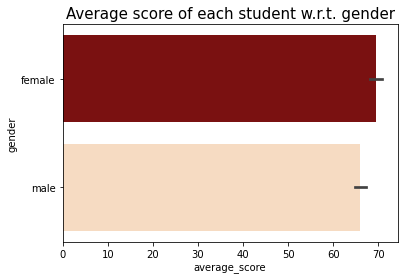

In [11]:
plt.title("Average score of each student w.r.t. gender",fontsize=15)
sns.barplot(data1["average_score"],data1["gender"],palette=["darkred","peachpuff"])

The average score of female students is higher than male students.

#### Test preparation course

Based on individual average of math, reading and writing score

In [12]:
mean_tpc=data.groupby("test preparation course")[["math score","reading score","writing score"]].mean()
mean_tpc

,math score,reading score,writing score
test preparation course,,,
completed,69.96648,74.175978,74.684358
none,63.78972,66.417445,64.457944


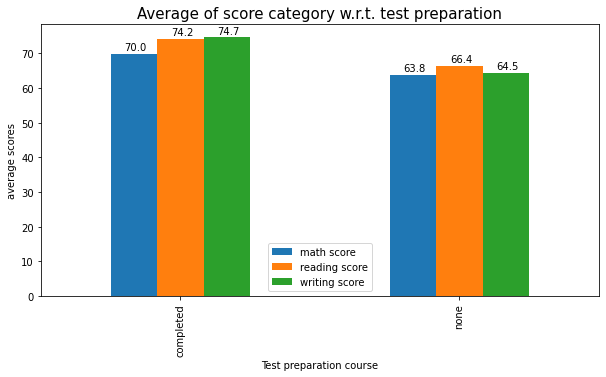

In [13]:
d=mean_tpc.plot(kind="bar",ylabel="average scores",xlabel="Test preparation course",figsize=(10, 5))
plt.title("Average of score category w.r.t. test preparation",fontsize=15)
for i in d.patches:
        d.annotate("{:.1f}".format(i.get_height()),(i.get_x()+0.05, i.get_height()+1))

The students who completed the test preparation course scored higher than those did not in maths, reading and writing.

Based on total average score of each student

C:\Users\rakhi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Average score of students w.r.t. test preparation course'}, xlabel='average_score', ylabel='test preparation course'>

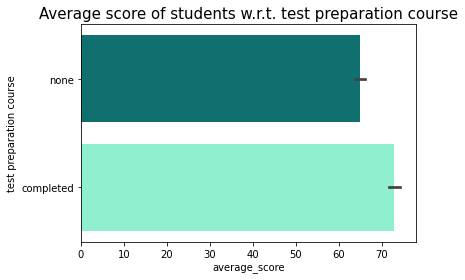

In [14]:
plt.title("Average score of students w.r.t. test preparation course",fontsize=15)
sns.barplot(data1["average_score"],data1["test preparation course"],palette=["teal","aquamarine"])

Those students who completed the test preparation course outperformed those who did not.

#### 4. What do you think about the scoring variation for math, reading and writing based on

#### ● Gender

In [15]:
std_gender=data.groupby("gender")[["math score","reading score","writing score"]].std()
std_gender

,math score,reading score,writing score
gender,,,
female,16.029928,14.411018,14.844842
male,14.556411,14.149594,14.227225


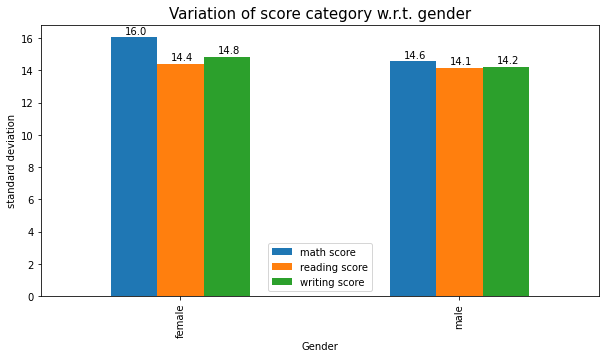

In [16]:
e=std_gender.plot(kind="bar",ylabel="standard deviation",xlabel="Gender",figsize=(10, 5))
plt.title("Variation of score category w.r.t. gender",fontsize=15)
for i in e.patches:
        e.annotate("{:.1f}".format(i.get_height()),(i.get_x()+0.05, i.get_height()+0.2))

For all the three scores, female students shows more variation than male students.

#### ● Test preparation course

In [17]:
std_tpc=data.groupby("test preparation course")[["math score","reading score","writing score"]].std()
std_tpc

,math score,reading score,writing score
test preparation course,,,
completed,14.521847,13.537572,13.236412
none,15.705689,14.608896,15.041667


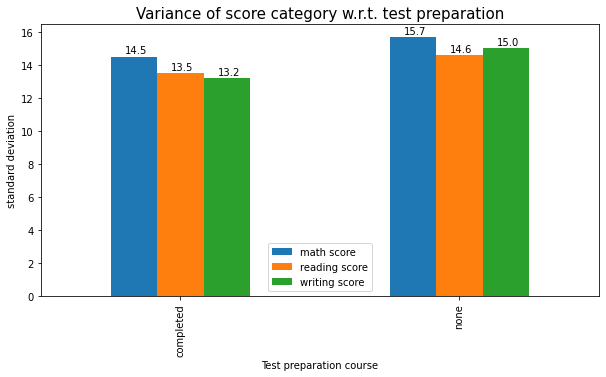

In [18]:
f=std_tpc.plot(kind="bar",ylabel="standard deviation",xlabel="Test preparation course",figsize=(10, 5))
plt.title("Variance of score category w.r.t. test preparation",fontsize=15)
for i in f.patches:
        f.annotate("{:.1f}".format(i.get_height()),(i.get_x()+0.05, i.get_height()+0.2))

Clearly, those students who didnt take the test preparation has more variability in all the three score categories

#### 5. The management needs your help to give bonus points to the top 25% of students based on their maths score, so how will you help the management to achieve this.

In [19]:
#finding the 3rd quantile
data["math score"].quantile(0.75)

77.0

Therefore, those students who score 77 or above are eligible for bonus point.

In [20]:
data["Bonus_point"]=["Eligible" if x>=77 else "Not Eligible" for x in data["math score"]]
data

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Bonus_point
0,female,group C,some high school,free/reduced,none,0,17,10,Not Eligible
1,female,group B,high school,free/reduced,none,8,24,23,Not Eligible
2,female,group B,some high school,free/reduced,none,18,32,28,Not Eligible
3,female,group B,some college,standard,none,11,38,32,Not Eligible
4,female,group C,some college,free/reduced,none,22,39,33,Not Eligible
...,...,...,...,...,...,...,...,...,...
995,male,group E,some college,standard,completed,99,87,81,Eligible
996,male,group A,some college,standard,completed,100,96,86,Eligible
997,male,group D,some college,standard,completed,100,97,99,Eligible
998,male,group E,associate's degree,free/reduced,completed,100,100,93,Eligible


This sorted data shows which studnets are eligilbe for the bonus point.